# Deep Learning & Neural Networks
## Project 2 - Binary Encodings

### SETUP

In [10]:
# Load TensorFlow
import tensorflow as tf
# Load numpy - adds MATLAB/Julia-style math to Python
import numpy as np
# Load matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt

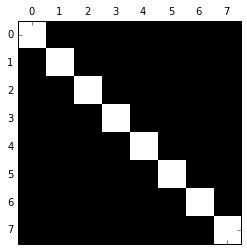

In [11]:
# Create the one-hot encodings
# Symmetric matrix, so doesn't really matter
# But for sanity, we'll think of row = number
data = np.matrix([
        [1,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0],
        [0,0,0,1,0,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,0,1,0,0],
        [0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,1],
    ], 'float32')
# Plot it
plt.matshow(data, cmap=plt.cm.gray)

### LIVE CODING BEGINS

In [9]:
# Lets create our computation graph
INPUT_DIM = 8
CODE_DIM = 3

# Encoder: a sigmoid, with no bias term
enc_weight = tf.Variable(tf.random_uniform([INPUT_DIM,CODE_DIM], -1.0, +1.0))
enc_input  = tf.matmul(data, enc_weight)
enc_output = tf.nn.sigmoid(enc_input)

# Decoder: a softmax, again with no bias
# We'll be tricky here: let's use the same weights, just transposed!
dec_weight = tf.transpose(enc_weight) #tf.Variable(tf.random_uniform([CODE_DIM,INPUT_DIM], -1.0, +1.0))
dec_weight = tf.Variable(tf.random_uniform([CODE_DIM,INPUT_DIM], -1.0, +1.0))
dec_input  = tf.matmul(enc_output,dec_weight)
dec_output = tf.nn.softmax(dec_input)

# Calculate the error between input and output
error = tf.reduce_sum(tf.square(data - dec_output))

# Create optimizer and get ready
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(error)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

### LIVE CODING ENDS

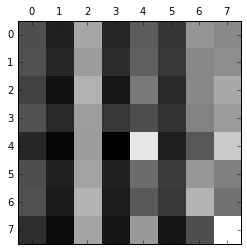

In [4]:
# What kind of output do we get right now?
plt.matshow(sess.run(dec_output), cmap=plt.cm.gray)

0 6.65015
100 4.88434
200 3.89801
300 3.42805
400 3.13699
500 2.73046
600 2.25752
700 1.97135
800 1.77986
900 1.63999
1000 1.52551
1100 1.42972
1200 1.35167
1300 1.28877
1400 1.23796
1500 1.19657
1600 1.16247
1700 1.13407
1800 1.11016
1900 1.08984
2000 1.07239
2100 1.05729
2200 1.04412
2300 1.03253
2400 1.02228
2500 1.01314
2600 1.00494
2700 0.997545
2800 0.990838
2900 0.984723
3000 0.979121
3100 0.973968
3200 0.969207
3300 0.964792
3400 0.960684
3500 0.956849
3600 0.95326
3700 0.949892
3800 0.946726
3900 0.943744
4000 0.94093
4100 0.938273
4200 0.935761
4300 0.933384
4400 0.931133
4500 0.929001
4600 0.926981
4700 0.925066
4800 0.923252
4900 0.921531


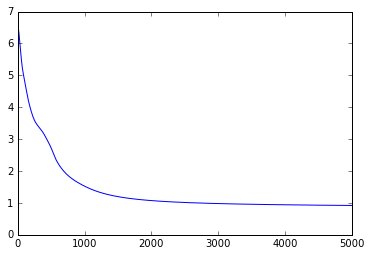

In [5]:
# Run some gradient steps
errors = []
N_STEPS = 5000
for step in range(N_STEPS):
    cur_error, _ = sess.run((error,train))
    errors.append(cur_error)
    if step % 100 == 0:
        print step, cur_error
plt.plot(range(N_STEPS), errors, 'b-')

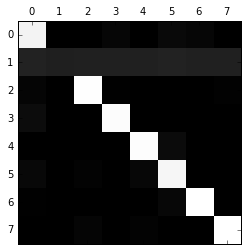

In [6]:
# Where are we now?
plt.matshow(sess.run(dec_output), cmap=plt.cm.gray)

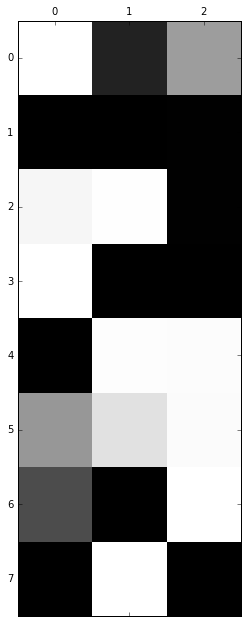

In [7]:
# What does the coding look like?
plt.matshow(sess.run(enc_output), cmap=plt.cm.gray)

In [ ]:
sess.run(enc_output)

In [8]:
np.unique(map(lambda l: int(''.join(map(str, l)), 2), np.round(sess.run(enc_output)).astype(int)))

array([0, 1, 2, 3, 4, 5, 6, 7])